# Exercise 1: Consumption-leisure choice

In the lecture we analyzed how a household optimally chooses consumption and labor supply. In this exercise, we revisit this setting, imposing different assumptions on the household's utility function.

Assume that the household chooses *consumption* $c$ and *leisure* $\ell$ in order to maximize
$$
\begin{aligned}
\max_{c,~\ell} ~\Bigl\{\log(c) &+ \psi \log(\ell) \Bigr\} \\ 
\text{subject to} \enskip c &= a + (1-\ell)w \\
    c &\geq 0 \\
    0 &\leq \ell \leq 1
\end{aligned}
$$
The second line represents the budget constraint, where $a$ is the level of assets and $w$ is the wage rate. The last line imposes that leisure has to be between 0 and 1, where 1 represents the entire time endowment of the household. Consequently, for a given leisure choice, the household supplies the remaining time $1-\ell$ in the labor market and earns $(1-\ell)w$ in labor income.

## Analytical solution

To solve the problem, we set up the Lagrangian,
$$
\mathcal{L} = \log(c) + \psi \log(\ell) + \lambda \Bigl(a  + (1-\ell)w - c \Bigr)
$$
which gives us the first-order conditions
$$
\left.
\begin{aligned}
\frac{\partial\mathcal{L}}{\partial c} &= \frac{1}{c} - \lambda &= 0 \\
\frac{\partial\mathcal{L}}{\partial \ell} &= \frac{\psi}{\ell} - \lambda w &= 0
\end{aligned}\right\rbrace \Longrightarrow c = \frac{\ell w}{\psi} 
$$
This condition characterizes the optimal allocation of consumption and leisure for a given wage rate.
Substituting this back into the budget constraint, we can solve for optimal leisure: 
$$
\ell^* = \frac{\psi}{1+\psi} \frac{a+w}{w}
$$
The optimal consumption level follows by plugging the above expression into the optimality condition we derived earlier.
$$
c^* = \frac{1}{1+\psi} (a+w)
$$

## Numerical solution

Instead of solving this problem analytically, we can use a numerical solver to obtain the optimal choices for a given set of parameters.

1.  Write a function `util()` which takes leisure $\ell$ and parameters as arguments and returns the corresponding utility level. 
    ```python
    def util(l, psi, a, w):
        """
        Compute utility for given leisure choice and parameters.
        """
        
    ```
    Use the budget constraint to obtain consumption for a given leisure choice.
2.  Assume that the model is parametrized by $a=0$, $w=1$ and $\psi=1$.
    Use the univariate minimizer 
    [`minimize_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html) 
    from the module 
    [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html) 
    and solve for the optimal leisure choice.
    Use the `util()` function you defined previously as the objective.

    *Hint:* Recall that you are using a *minimizer* to solve a maximization problem, hence you need to flip the sign
    of your objective function, e.g., by using a `lambda` expression.

    *Hint:* Use the `bounds` argument to `minimize_scalar()` to restrict the set of admissible values for $\ell$.
3.  You want to make the above implementation more flexible so you can experiment with different parameter values.
    Write a function `solve_cons_leisure()` which takes *only* the parameters as arguments and returns a tuple containing
    the optimal consumption and leisure choices:

    ```python
    def solve_cons_leisure(psi, a, w):
        """
        Solve for the optimal consumption/leisure choice for given parameters.
        """
    ```
    
    For this part, you should just reuse the code you wrote earlier by wrap it in a function.
4.  You are interested in how the optimal leisure and consumption choices depend on the utility weight on leisure, $\psi$.
    Use the function you wrote in the last part to evaluate optimal consumption and leisure
    for a grid of 21 points for $\psi$ that is uniformly spaced on the interval $[0, 2]$.

    Create a graph with two panels, one for consumption and one for leisure, plotting the optimal choices against the values of $\psi$.
    What is the intuition for the slope of $c$ and $\ell$ as $\psi$ changes?

5.  Since this problem admits an analytical solution, compute the *exact* optimal choices using the equations from above for
    each value on the $\psi$ grid you used in the previous part.

    Adapt your graph to show both the numerical and the analytical solution. Use a legend to clearly label what is being plotted.

## Solution

#### Part (1)

In [1]:
import numpy as np

def util(l, psi, a, w):
    """
    Compute utility for given leisure choice and parameters.
    """
    c = a + (1-l)*w
    u = np.log(c) + psi * np.log(l)
    return u


#### Part (2)

In [2]:
# Set model parameters

a = 0       # assets
w = 1       # wage rate
psi = 1     # preference parameter

In [3]:
from scipy.optimize import minimize_scalar, minimize

# Run the minimizer to find the maximum.
# We use a lambda expression to (1) switch the sign of the objective, and 
# (2) to pass the additional parameters to the utility function.
res = minimize_scalar(lambda x: -util(x, psi, a, w), bounds=(0, 1))

In [4]:
# Inspect the optimization result
res

 message: Solution found.
 success: True
  status: 0
     fun: 1.3862943611198906
       x: 0.5
     nit: 6
    nfev: 6

In [5]:
# Store the optimal leisure
l_opt = res.x

# Recover optimal consumption from the budget constraint
c_opt = a + (1 - l_opt) * w

# Report the results
print(f'Optional leisure choice: {l_opt}')
print(f'Optional consumption choice: {c_opt}')

Optional leisure choice: 0.5
Optional consumption choice: 0.5


#### Part (3)

In [6]:
# Define function which returns the optimal allocation

def solve_cons_leisure(psi, a, w):
    """
    Solve for the optimal consumption/leisure choice for given parameters.
    """

    res = minimize_scalar(lambda x: -util(x, psi, a, w), bounds=(0, 1))

    l_opt = res.x
    c_opt = a + (1 - l_opt) * w

    return c_opt, l_opt


In [7]:
# Test function with same parameters as before

c_opt, l_opt = solve_cons_leisure(psi, a, w)

# Report the results
print(f'Optional leisure choice: {l_opt}')
print(f'Optional consumption choice: {c_opt}')

Optional leisure choice: 0.5
Optional consumption choice: 0.5


#### Part (4)

We need to loop through the grid of values for $\psi$ and solve for the optimal allocation for each parameter value.

In [8]:
# Grid of psi parameters of interest
psi_grid = np.linspace(0.0, 2.0, 21)

# Previous parameters remain unchanged
a = 0
w = 1

# Create empty arrays to store optimal choices for each value of psi
c_opt_grid = np.empty_like(psi_grid)
l_opt_grid = np.empty_like(psi_grid)

for i, psi in enumerate(psi_grid):
    # Compute optimal choices for given psi
    c_opt, l_opt = solve_cons_leisure(psi, a, w)

    # Store optimal choices
    c_opt_grid[i] = c_opt
    l_opt_grid[i] = l_opt


Once we have the arrays of optimal allocations, we can create a graph with 2 panels for consumption and leisure to visualize them:

Text(0.5, 0, '$\\psi$')

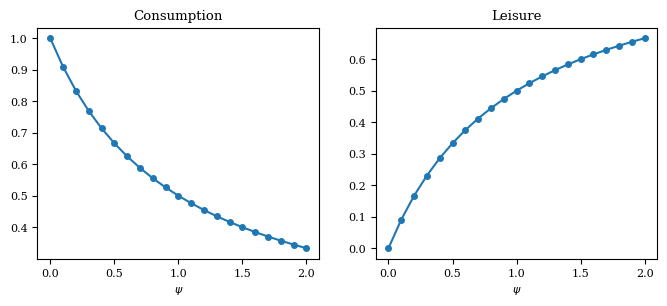

In [9]:
import matplotlib.pyplot as plt


# Create figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].plot(psi_grid, c_opt_grid, marker='o', ms=4)
ax[0].set_title('Consumption')
ax[0].set_xlabel(r'$\psi$')

ax[1].plot(psi_grid, l_opt_grid, marker='o', ms=4)
ax[1].set_title('Leisure')
ax[1].set_xlabel(r'$\psi$')

#### Part (5)

Since this problem admits an analytical solution, we can just compute the optimal allocations using the equations from above.

In [10]:
# Compute analytical solutions for given psi_grid

c_opt_exact = 1/(1 + psi_grid) * (a + w)
l_opt_exact = psi_grid/(1 + psi_grid) * (a + w) / w

We adapt the plotting code from above and add the analytical solutions to each panel. Note that we can pass the `label` keyword argument to `plot()` to automatically set the legend text for each line.

Text(0.5, 0, '$\\psi$')

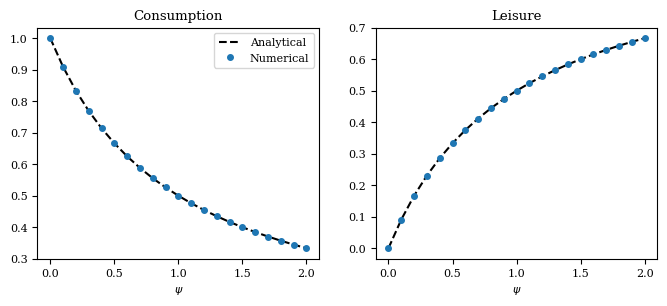

In [11]:
# Recreate the graphs from above, add analytical solution

# Create figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

# Plot analytical solution
ax[0].plot(psi_grid, c_opt_exact, ls='--', color='black', label='Analytical')
# Plot numerical solution
ax[0].plot(psi_grid, c_opt_grid, marker='o', ms=4, ls='none', label='Numerical')
ax[0].set_title('Consumption')
ax[0].set_xlabel(r'$\psi$')
# Add legend in the upper right corner
ax[0].legend(loc='upper right')

# Plot analytical solution
ax[1].plot(psi_grid, l_opt_exact, ls='--', color='black', label='Analytical')
# Plot numerical solution
ax[1].plot(psi_grid, l_opt_grid, marker='o', ms=4, ls='none', label='Numerical')
ax[1].set_title('Leisure')
ax[1].set_xlabel(r'$\psi$')

***
# Exercise 2: Consumption & labor supply with commuting

Recall the consumption & labor supply problem we studied in the lecture:
the individual has preferences over consumption and leisure given by
$$
u(c,h) = \frac{c^{1-\gamma} - 1}{1-\gamma} - \psi \frac{h^{1+1/\theta}}{1+1/\theta}
$$
where $c \geq 0$ is the amount consumed, and $h \geq 0$ (for "hours") is the amount of labor the individual wishes to work (the remaining time is then consumed as leisure). The individual does not like working, and therefore the amount of hours worked enters as a disutility term in the utility function.
Note that for the special case of $\gamma = 1$, the utility from consumption becomes $\log(c)$,
the natural logarithm of $c$, so that
$$
u(c,h) = \log(c) - \psi \frac{h^{1+1/\theta}}{1+1/\theta}
$$


Unlike in the lecture, we assume that the individual can either work part-time for $h < H$ hours in their neighborhood for a lower wage $w_{\ell}$ 
or commute to the city to work full-time for $h \geq H$ hours at a higher wage $w_h$. 
However, commuting to the city incurs a fixed commuting cost $\kappa$. 
The budget constraint is therefore given by 
$$
c = \begin{cases}
a + w_{\ell} \cdot h & \text{if } h < H \\
a + w_{h} \cdot h - \kappa & \text{if } h \geq H \\
\end{cases}
$$
This is an example of a problem that is harder to solve analytically because of the discountinuous jump at the choice $h=H$.
As you will see, this discontinuity can also cause problems for numerical solvers.

To get you started, use the following function to evaluate the utility for given choices and parameters (it's the same one we wrote in the lecture):

In [12]:
import numpy as np

def util(c, h, gamma, psi, theta):
    """
    Compute the utility of a given consumption/labor supply choice.

    Parameters
    ----------
    c : float or array
        Consumption level.
    h : float or array
        Hours worked.
    gamma : float
        Relative risk aversion parameter.
    psi : float
        Weight on disutility of labor.
    theta : float
        Labor supply elasticity.

    Returns
    -------
    u : float or array
        Utility value.
    """

    # Consumption utility
    if gamma == 1:
        # Log utility
        u = np.log(c)
    else:
        # General CRRA utility
        u = (c**(1-gamma) - 1) / (1-gamma)

    # add disutility of labor
    u -= psi * h**(1 + 1/theta) / (1 + 1/theta)

    return u

In the remainder of this exercise, you're asked to find the optimal choices using grid search and two different SciPy minimizer.
Use the following parameters for these tasks:

In [13]:
# Parameters
a = 0           # initial assets
w_l = 0.75      # low wage (neighborhood)
w_h = 3         # high wage (city)
gamma = 1.0     # Relative risk aversion
psi = 2.0       # weight on disutility of labor
theta = 0.5     # labor supply elasticity
H = 1.0         # cut-off for part-time work
kappa = 2.0     # commuting cost

## Tasks

1.  Write a function with the signature

    ```python
    def util_h(h, gamma, psi, theta, H, kappa, a, w_l, w_h):
        """
        Compute utility for given labor choice and parameters.
        """
    ```

    which uses `util()` to return the utility associated with a hours choice `h`.
    Use the budget constraint to obtained the implied consumption level.

    *Hint:* To get a vectorized function (which can deal with `h` arguments that are arrays),
    use 
    [`np.where()`](https://numpy.org/doc/stable/reference/generated/numpy.where.html)
    instead of an `if` statement when dealing with the two cases in
    the budget constraint.

2.  Solve the problem using grid search, evaluating utility
    on a grid of 10,000 points for $h$ on the interval $[0.1, 2]$.
    Plot utility as a function of $h$ for the values on the hours grid.

3.  Use the scalar minimizer
    [`minimize_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html)
    and the function `util_h()` you wrote
    to locate the optimum. Do you get a similar result as with grid search?

4.  Lastly, use `util_h()` and a derivative-based minimizer implemented by 
    [`minimize()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)
    to find the optimum.

    *Hint:* Call this minimizer as follows:

    ```python
    res = minimize(
        lambda x: -util_h(x, gamma, psi, theta, H, kappa, a, w_l, w_h), 
        x0 = x0,
        method='L-BFGS-B',
        bounds=((0, None),)
    )
    ```

    This selects the `'L-BFGS-B'` algorithm, a derivative-based method
    which also supports bounds. We impose these using the 
    `bounds=((0, None),)` argument which imposes the $h \geq 0$ lower bound.

    You need to specify an initial guess `x0`: experiment with `x0=0.75`
    and `x0=1.1`. Do these yield the same result?

    *Hint:* The `minimize()` returns a result object where the optimum 
    is stored in the `x` attribute, which in this case is an array of length 1.


## Solution

### Part (1): Objective function

The implementation of `util_h()` is also almost identical to what we 
did in the lecture, except that we have to be more careful with handling 
the budget constraint.

Note that we could have written
```python
if h < H:
    c = a + w_l * h
else:
    c = a + w_h * h - kappa
```
but this has the disadvantage that it only works with scalar values for `h`
and thus makes the function hard to use for grid search.

In [14]:
def util_h(h, gamma, psi, theta, H, kappa, a, w_l, w_h):
    """
    Compute utility for given labor choice and parameters.

    Parameters
    ----------
    h : float or array
        Hours worked.
    gamma : float
        Relative risk aversion parameter.
    psi : float
        Weight on disutility of labor.
    theta : float
        Labor supply elasticity.
    H : float
        Cut-off for part-time work.
    kappa : float
        Commuting cost.
    a : float
        Initial assets.
    w_l : float
        Low wage (neighborhood).
    w_h : float
        High wage (city).        

    Returns
    -------
    u : float or array
        Utility value.
    """

    # Recover consumption from the budget constraint.
    # Use np.where() instead of 'if' to support vectorized evaluation.
    c = np.where(h < H, a + w_l * h, a + w_h * h - kappa)

    # Use our previous implementation of u(c,h) to compute utility.
    u = util(c, h, gamma, psi, theta)

    return u

### Part (2): Grid search

For grid search we define the grid of candidate values for $h$:

In [15]:
# Number of grid points
N = 10000

# Create candidate grid of hours worked
h_grid = np.linspace(0.1, 2, N)

Because we implemented `util_h()` in a vectorized fashion, we can evaluate 
utility for all hours choices in a single call, without having to use a loop.

In [16]:
# Evaluate utility for all candidate hours choices
u_grid = util_h(h_grid, gamma, psi, theta, H, kappa, a, w_l, w_h)

In [17]:
# Locate index where utility is maximized
imax = np.argmax(u_grid)

# Recover the maximizing hours and consumption choices
h_opt = h_grid[imax]

# Recover the maximized utility level
u_max = u_grid[imax]

print(f'Utility is maximized at h={h_opt:.8f}; u_max={u_max:.8f}')

Utility is maximized at h=1.08866887; u_max=-0.62432595


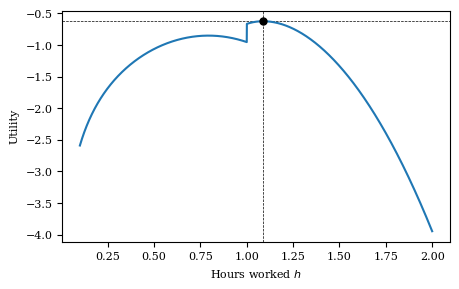

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.plot(h_grid, u_grid)
plt.plot(h_opt, u_max, marker='o', ms=5, color='black')
plt.xlabel(r'Hours worked $h$')
plt.ylabel('Utility')
plt.axhline(u_max, ls='--', lw=0.5, color='black', zorder=-1)
plt.axvline(h_opt, ls='--', lw=0.5, color='black', zorder=-1)


### Part (3): Derivative-free minimizer

Locating the maximum using `maximize_scalar()` works in exactly the same way as in the lecture:

In [19]:
from scipy.optimize import minimize_scalar

# Set boundaries for minimization
# We don't use 0 as the lower bound, since with a=0 that yields -inf utility.
bounds = (1.0e-8, 2)

# Perform maximization using bounded minimizer
res = minimize_scalar(
    lambda x: -util_h(x, gamma, psi, theta, H, kappa, a, w_l, w_h), 
    bounds=bounds
)

In [20]:
# Extract optimal hours and associated utility
h_opt = res.x
u_max = - res.fun

print(f'Utility is maximized at h={h_opt:.8f}; u_max={u_max:.8f}')

Utility is maximized at h=1.08859505; u_max=-0.62432592


We see that the optimum is also quite close to the grid search result, despite the poorly-behaved objective function shown above.

### Part (4): Derivate-based minimizer

Calling [`minimize()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)
instead of `minimize_scalar()` works in a similar fashion, except that the former supports
multivariate minimization, i.e., the choice variable `x` is treated as a vector. However,
the function also supports scalar minimization.

First, we call `minimize()` with a starting guess of `x0=0.75`, which returns 
the *wrong* optimum. This is the local maximum depicted on the left side in the above graph.
The reason is that derivative-based minimizers find *local* minima, and these need not be global minima if the objective function is not sufficiently well behaved.

In [21]:
from scipy.optimize import minimize

# Perform maximization using derivative-based minimizer
res = minimize(
    lambda x: -util_h(x, gamma, psi, theta, H, kappa, a, w_l, w_h), 
    x0 = 0.75,
    method='L-BFGS-B',
    bounds=((0, None), )
)

In [22]:
# Extract optimal hours and associated utility
h_opt_lo = res.x[0]
u_max_lo = - res.fun

print(f'Utility is maximized at h={h_opt_lo:.8f}; u_max={u_max_lo:.8f}')

Utility is maximized at h=0.79370054; u_max=-0.85206447


On the other hand, starting with a higher value of `x0=1.1` returns the correct maximum:

In [23]:
# Perform maximization using derivative-based minimizer
res = minimize(
    lambda x: -util_h(x, gamma, psi, theta, H, kappa, a, w_l, w_h), 
    x0 = 1.1,
    method='L-BFGS-B',
    bounds=((0, None), )
)

In [24]:
# Extract optimal hours and associated utility
h_opt_hi = res.x[0]
u_max_hi = - res.fun

print(f'Utility is maximized at h={h_opt_hi:.8f}; u_max={u_max_hi:.8f}')

Utility is maximized at h=1.08859426; u_max=-0.62432592


The following graph illustrates the two different maxima. As you can see, both of them are local maxima, but only one of them is global. Numerical optimizers are usually only able to identify local maxima.

Text(0.5, 1.0, 'Utility maximization with different initial guesses')

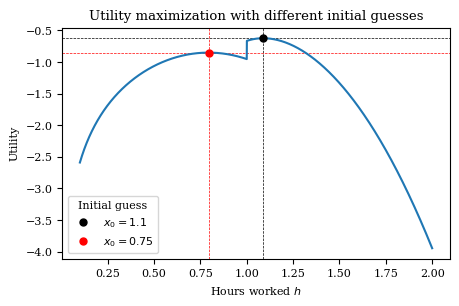

In [25]:
plt.figure(figsize=(5, 3))
plt.plot(h_grid, u_grid)
hi = plt.plot(h_opt_hi, u_max_hi, marker='o', ms=5, color='black', ls='none')
lo = plt.plot(h_opt_lo, u_max_lo, marker='o', ms=5, color='red', ls='none')
plt.xlabel(r'Hours worked $h$')
plt.ylabel('Utility')
plt.axhline(u_max_hi, ls='--', lw=0.5, color='black', zorder=-1)
plt.axvline(h_opt_hi, ls='--', lw=0.5, color='black', zorder=-1)
plt.axhline(u_max_lo, ls='--', lw=0.5, color='red', zorder=-1)
plt.axvline(h_opt_lo, ls='--', lw=0.5, color='red', zorder=-1)
plt.legend([hi[0], lo[0]], ['$x_0=1.1$', '$x_0=0.75$'], title='Initial guess')
plt.title('Utility maximization with different initial guesses')

The take-away is that one has to be careful with numerical optimization, especially with algorithms which use derivatives of the objective. If the assumptions underlying the objective function are not satisfied, the algorithm might return a wrong result.

***
# Exercise 3: Consumption-savings with uncertain income

We have studied the two-period consumption savings problems several times now, but so far, income in the second period was deterministic.
This setting can be extended to uncertain income, a feature that is at the core of modern macroeconomics.

Consider a household which maximizes *expected* lifetime utility by choosing period-1 consumption $c_1$ and savings $s$,
$$
\begin{aligned}
\max_{c_1,~s} \enskip & \Bigl\{ u(c_1) + \beta \mathbb{E}\bigl[u(c_2)\bigr] \Bigr\} \\
\text{s.t.} \quad c_1 + s &= a \\
                  c_2 &= (1+r)s + y_2 \\
    c_1 &\geq 0, ~ s \geq 0
\end{aligned}
$$
Per-period utility $u(c)$ is the CRRA utility function given by
$$
u(c) = \begin{cases}
    \frac{c^{1-\gamma}}{1-\gamma} & \text{if } \gamma \neq 1 \\
    \log(c) & \text{if } \gamma = 1
    \end{cases}
$$
where $\gamma$ is the RRA coefficient and $\log(\bullet)$ denotes
the natural logarithm.

The savings $s$ generate a gross return $(1+r)$ in the second period. Additionally, the household receives stochastic income $y_2$.
For simplicity, we assume that $y_2$ fluctuates symmetrically around its mean and can take on only two realizations:
$$
y_2 = \begin{cases}
\overline{y} + \epsilon & \text{with probability } \frac{1}{2} \\
\overline{y} - \epsilon & \text{with probability } \frac{1}{2} \\
\end{cases}
$$
You can easily verify that $\mathbb{E}[y_2] = \overline{y}$ and $\text{Var}(y_2) = \epsilon^2$ so that the parameters $\overline{y}$ and $\epsilon$
govern the mean and the volatility of period-2 income, respectively.

## Analytical results

In general, it is not possible to solve such a problem analytically unless we are willing to impose simplifying assumptions (e.g., setting $\gamma=1$,
but even then the optimal $s^*$ is characterized by a tedious quadratic equation).

Nevertheless, we can use the Euler equation for this problem,
$$
u'(c_1) = \beta (1+r) \mathbb{E} \bigl[ u'(c_2) \bigr]
$$
to solve the problem numerically using root-finding. For this purpose, we use the functional form assumption for $u(\bullet)$ and plug in the period-specific budget constraints into the Euler equation to obtain,
<a id="E3:EE"></a>
$$
\bigl(a -s \bigr)^{-\gamma} = \beta (1+r) \mathbb{E} \Bigl[ \bigl( (1+r) s + y_2 \bigr)^{-\gamma} \Bigr]
    \tag{3.1}
$$
which is a nonlinear equation in a single unknown, $s$.

## Numerical solution

In the remainder of the exercise, you are asked to solve this problem numerically using both a minimizer and a root-finder approach. You should use the following implementation of per-period utility $u(\bullet)$:

In [26]:
import numpy as np

def util(c, gamma):
    """
    Compute per-period utility for given consumption.

    Parameters
    ----------
    c : float or array
        Consumption level.
    gamma : float
        Relative risk aversion parameter.

    Returns
    -------
    u : float or array
        Utility value.
    """
    if gamma == 1:
        # Log preferences
        u = np.log(c)
    else:
        # General CRRA preferences
        u = c**(1-gamma) / (1-gamma)
    return u

Moreover, assume the following parameters for the tasks below:

In [27]:
# Parameters
ybar = 0.5          # average period-2 income
epsilon = 0.2       # standard deviation of period-2 income
a = 1.0             # initial assets
r = 0.04            # interest rate
gamma = 2.0         # relative risk aversion
beta = 0.96         # discount factor

### Tasks

1. Define a function `util_life()` with the following signature which should return 
    the expected life-time utility for a given savings choice $s$:

    ```python
    def util_life(s, beta, gamma, a, r, ybar, epsilon):
        """
        Evaluate lifetime utility for given savings choice and parameters.
        """
    ```

2.  Plot this function against a grid of candidate savings levels $s$. You should define a savings grid with reasonale bounds for this task.

3.  Write a function `solve_minimize()` with the following signature which should 
    use 
    [`minimize_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html) 
    from `scipy.optimize` to find the optimal choices for given parameters.

    ```python
    def solve_minimize(beta, gamma, a, r, ybar, epsilon):
        """
        Solve consumption-savings problem using a minimizer.
        """

    ```

    Your function should return the tuple $(c_1^*, s^*, U^*)$, i.e., the
    optimal consumption in period 1, optimal savings, and the maximized lifetime
    utility $U^*$.

    Run the minimizer for the given parameters and report the results.

4.  The model we are studying features a *precautionary savings motive*: an
    increase in risk induces households to increase their savings.

    Investigate this behavior by computing the solution for a grid
    of $\epsilon$ defined on the interval $[0, \overline{y}]$. Note that
    varying epsilon only increases the variance of income shocks in 
    period 2 but leaves the mean $\mathbb{E}y_2$ unaffected.

    Plot optimal savings against $\epsilon$ for both $\gamma = 1$ and 
    $\gamma = 2$ in a single plot. Why are the responses different?

5.  Lastly, find the optimal choices using a root-finder. To this end, 
    rewrite the Euler equation [(3.1)](#E3:EE) as 
    $$
    f(s) = \bigl(a -s \bigr)^{-\gamma} - \beta (1+r) \mathbb{E} \Bigl[ \bigl( (1+r) s + y_2 \bigr)^{-\gamma} \Bigr]
    $$
    which returns the Euler equation error for savings $s$. The optimal 
    choice needs to satisfy $f(s^*) = 0$, so you need to find the root of $f$.

    1.  Write a function `euler_err()` with the following signature
        which implements $f$ and returns the Euler equation error:

        ```python
        def euler_err(s, beta, gamma, a, r, ybar, epsilon):
            """
            Compute the Euler equation error for a given savings choice.
            """
        ```

    2.  Plot this function against the savings grid used earlier to verify that
        this function indeed has a root somewhere.

    3.  Use the root-finder 
        [`root_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html)
        to locate this root (choose the method `brentq` and specify an initial `bracket`).

    4.  Verify that this approach yields the same result as the minimizer.

## Solution

### Part (1): Objective function

In [28]:
def util_life(s, beta, gamma, a, r, ybar, epsilon):
    """
    Evaluate lifetime utility for given savings choice and parameters.

    Parameters
    ----------
    s : float or array
        Savings choice.
    beta : float
        Discount factor.
    gamma : float
        Relative risk aversion.
    a : float
        Initial assets.
    r : float
        Interest rate.        
    ybar : float
        Average period-2 income.
    epsilon : float
        Standard deviation of period-2 income.

    Returns
    -------
    obj : float or array
        Lifetime utility.
    """

    # Period 1 consumption
    c1 = a - s
    # Period 1 utility
    u1 = util(c1, gamma)

    # Compute period-2 assets
    a2 = (1 + r)*s

    # Compute expected utility of period-2 wealth
    c2_hi = a2 + ybar + epsilon
    c2_lo = a2 + ybar - epsilon

    # Utility in high and low states
    u2_hi = util(c2_hi, gamma)
    u2_lo = util(c2_lo, gamma)

    # Compute expected utility
    prob = 0.5
    Eu2 = prob*u2_hi + (1 - prob)*u2_lo
    
    # lifetime utility
    obj = u1 + beta * Eu2

    return obj

### Part (2)

To plot expected lifetime utility, we evaluate the `util_file()` function on a savings grid. Note that with these parameters, zero savings is admissible as there is guaranteed positive income $y_2 > 0$ next period. However, it cannot be optimal to save all initial assets $a$, so we set the savings grid upper bound somewhat below that value.

Text(0.5, 1.0, 'Lifetime utility')

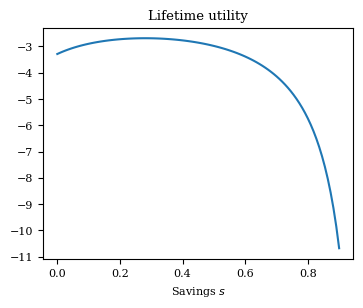

In [29]:
import matplotlib.pyplot as plt

# Savings grid for evaluating lifetime utility
s_grid = np.linspace(0, a-1.0e-1, 100)
# Evaluate lifetime utility for each savings choice
u_grid = util_life(s_grid, beta, gamma, a, r, ybar, epsilon)

# Plot lifetime utility
plt.plot(s_grid, u_grid)
plt.xlabel('Savings $s$')
plt.title('Lifetime utility')

### Part (3): Running the minimizer

The following function calls the minimizer and returns optimal choices for given parameters:

In [30]:
from scipy.optimize import minimize_scalar

def solve_minimize(beta, gamma, a, r, ybar, epsilon):
    """
    Solve consumption-savings problem using a minimizer.

    Parameters
    ----------
    s : float or array
        Savings choice.
    beta : float
        Discount factor.
    gamma : float
        Relative risk aversion.
    a : float
        Initial assets.
    r : float
        Interest rate.        
    ybar : float
        Average period-2 income.
    epsilon : float
        Standard deviation of period-2 income.

    Returns
    -------
    c1_opt : float
        Optimal period-1 consumption.
    s_opt : float
        Optimal savings.
    u_max : float
        Maximum lifetime utility.

    """

    # Set boundaries for admissible savings
    bounds = (0, a)

    # Run the minimizer
    res = minimize_scalar(
        lambda s: -util_life(s, beta, gamma, a, r, ybar, epsilon), 
        bounds=bounds
    )

    if not res.success:
        print('Minimizer did not terminate successfully')

    # Recover optimal choices and maximized utility
    s_opt = res.x
    c1_opt = a - s_opt
    u_max = - res.fun

    return c1_opt, s_opt, u_max

We can now use `solve_minimize()` to obtain optimal choices and the maximized lifetime utility:

In [31]:
# Solve the model for given parameters
c1_opt, s_opt, u_max = solve_minimize(beta, gamma, a, r, ybar, epsilon)

print('Minimizer solution:')
print(f'  c_1   = {c1_opt: .8f}')
print(f'  s     = {s_opt: .8f}')
print(f'  u_max = {u_max:.3e}')

Minimizer solution:
  c_1   =  0.71935843
  s     =  0.28064157
  u_max = -2.685e+00


### Part (4): Precautionary savings

We first define a grid for $\epsilon$ and run the solver for both $\gamma = 1$ and $\gamma = 2$.

In [32]:
# Grid of volatilities
epsilon_grid = np.linspace(0.0, ybar, 100)

# Grid of risk aversions for which to solve the model
gammas = [1.0, 2.0]

# Allocate array to store optimal savings
s_opt_grid = np.empty((len(gammas), len(epsilon_grid)))

# Loop over gamma and epsilons
for i, gam in enumerate(gammas):
    for j, eps in enumerate(epsilon_grid):
        # Solve the model for current gamma and epsilon
        c1_opt, s_opt, u_max = solve_minimize(beta, gam, a, r, ybar, eps)
        s_opt_grid[i, j] = s_opt

The following code plots optimal savings by $\gamma$ against the volatility of income. As you can see, savings increase more for higher values of $\gamma$. This is because with higher $\gamma$, households are more risk averse and thus increase savings to insure themselves against adverse income shocks.

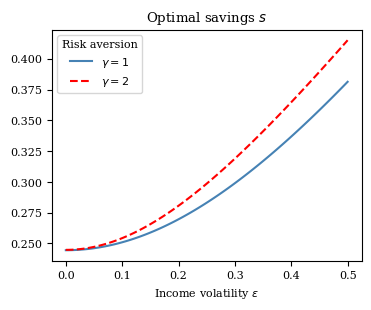

In [33]:
plt.plot(epsilon_grid, s_opt_grid[0], c='steelblue', label=r'$\gamma=1$')
plt.plot(epsilon_grid, s_opt_grid[1], c='red', ls='--', label=r'$\gamma=2$')
plt.xlabel(r'Income volatility $\epsilon$')
plt.title('Optimal savings $s$')
plt.legend(title='Risk aversion')

### Part (5): Root-finder

The following function returns the Euler equation errors. It's a minor modification
of `util_life()` from earlier, where we compute marginal utilities instead.

In [34]:
def euler_err(s, beta, gamma, a, r, ybar, epsilon):
    """
    Compute the Euler equation error for a given savings choice.

    Parameters
    ----------
    s : float or array
        Savings choice.
    beta : float
        Discount factor.
    gamma : float
        Relative risk aversion.
    a : float
        Initial assets.
    r : float
        Interest rate.        
    ybar : float
        Average period-2 income.
    epsilon : float
        Standard deviation of period-2 income.

    Returns
    -------
    err : float or array
        Euler equation error.
    """

    # Period 1 consumption
    c1 = a - s

    # Compute period-2 assets
    a2 = (1 + r)*s

    # Compute expected marginal utility of period-2 wealth
    c2_hi = a2 + ybar + epsilon
    c2_lo = a2 + ybar - epsilon

    # Marginal utility in high and low states
    mu2_hi = c2_hi**(-gamma)
    mu2_lo = c2_lo**(-gamma)

    # Compute expected marginal utility
    prob = 0.5
    Emu2 = prob*mu2_hi + (1 - prob)*mu2_lo

    # Marginal utility of period-1 consumption
    mu1 = c1**(-gamma)

    # Euler equation error
    err = mu1 - beta*(1 + r)*Emu2

    return err

We first evaluate the Euler equation errors on a savings grid to verify that this function has a root somewhere on the interval.

Text(0.5, 1.0, 'Euler equation error')

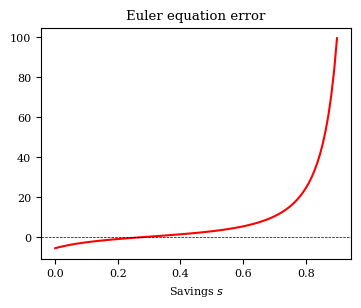

In [35]:
# Savings grid
s_grid = np.linspace(0, a-1.0e-1, 100)
# Euler equation errors for each savings choice
eee_grid = euler_err(s_grid, beta, gamma, a, r, ybar, epsilon)

# Plot Euler equation errors
plt.plot(s_grid, eee_grid, c='red')
plt.axhline(0, ls='--', lw=0.5, color='black')
plt.xlabel('Savings $s$')
plt.title('Euler equation error')

We can now use the scalar root-finder to locate this root.

In [36]:
from scipy.optimize import root_scalar

# Initial bracket of admissible savings
bracket = (0, a-1.0e-8)

# Run the root-finder (method='brentq' is the default if a bracket is given)
res = root_scalar(
    lambda s: euler_err(s, beta, gamma, a, r, ybar, epsilon), 
    bracket=bracket
)

Inspecting the result object shows that the root-finder terminated successfully:

In [37]:
res

      converged: True
           flag: converged
 function_calls: 12
     iterations: 11
           root: 0.28064171517302056
         method: brentq

Finally, we recover the optimal choices from the result object. Note that the root-finder does not return the maximized utility (since it does not operate on the lifetime utility function), so we have to compute that value manually.

In [38]:
s_opt = res.root
c1_opt = a - s_opt
u_max = util_life(s_opt, beta, gamma, a, r, ybar, epsilon)

print('Root-finder solution:')
print(f'  c_1   = {c1_opt: .8f}')
print(f'  s     = {s_opt: .8f}')
print(f'  u_max = {u_max:.3e}')

Root-finder solution:
  c_1   =  0.71935828
  s     =  0.28064172
  u_max = -2.685e+00
